In [1]:
# Model stuff
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import scipy.io as io


#our scripts
import model_utility
import spoketools
import preprocess_filter

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd



Segmentation Models: using `tf.keras` framework.


In [2]:
model_path = "../models/best/darkPDAug_spoke_360im_300e_resnet34.h5"
model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

folder_of_interest = '074_SPKLFMOV'
model_of_interest = 'pixel_dropout'

In [3]:
# test_folder = glob.glob("../data/2023_rpjb/good/074_SPKLFMOV/*.rpjb")
# pixel_values_list = []

# for rpjb in test_folder:
    
#     filenames, pixel_values, coords = preprocess_filter.apply_filters(rpjb)
#     pixel_values, coords = preprocess_filter.buffer_image(pixel_values, 736, 160, coords)
#     pixel_values = preprocess_filter.remove_cosmic_rays(pixel_values)
#     pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
#     pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)

#     # plt.imshow(pixel_values, cmap = "gray", origin = "lower")
#     # plt.show()

#     plt.imshow(pixel_values, cmap = "gray", origin = "lower")
#     plt.show()
#     pixel_values_list.append(pixel_values)

# pixel_values_list = normalize(np.array(pixel_values_list), axis=1)


if not os.path.exists(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application'):
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application')

if not os.path.exists(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}'):
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}')
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/imagery')
    os.mkdir(f'../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data')



    

../data/2023_imagery/filtered/074_SPKLFMOV/W1593678128.png


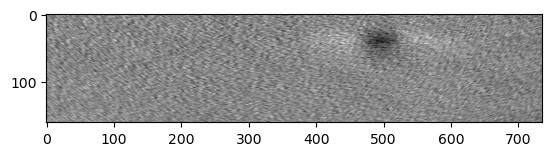

../data/2023_imagery/filtered/074_SPKLFMOV/W1593676089.png


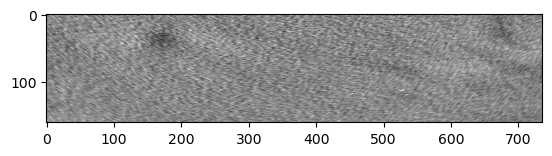

../data/2023_imagery/filtered/074_SPKLFMOV/W1593704635.png


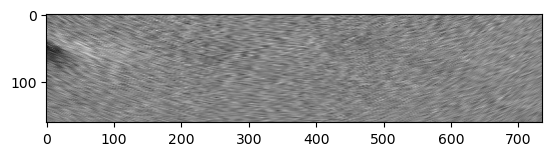

../data/2023_imagery/filtered/074_SPKLFMOV/W1593684245.png


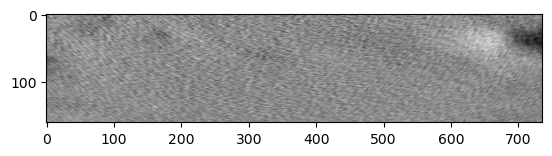

../data/2023_imagery/filtered/074_SPKLFMOV/W1593700557.png


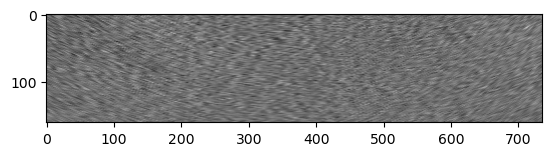

../data/2023_imagery/filtered/074_SPKLFMOV/W1593698518.png


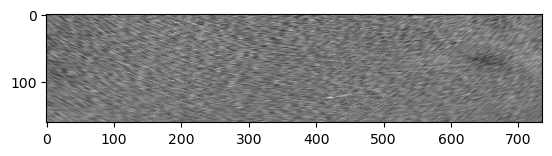

../data/2023_imagery/filtered/074_SPKLFMOV/W1593686284.png


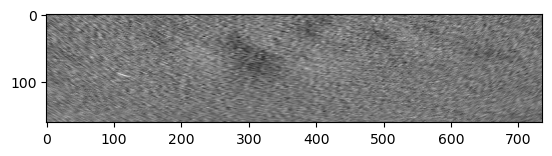

../data/2023_imagery/filtered/074_SPKLFMOV/W1593694440.png


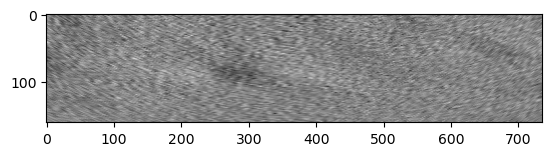

../data/2023_imagery/filtered/074_SPKLFMOV/W1593688323.png


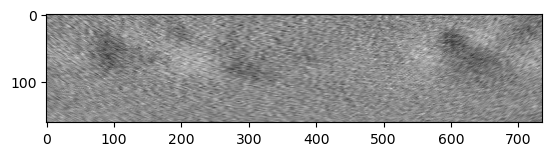

../data/2023_imagery/filtered/074_SPKLFMOV/W1593696479.png


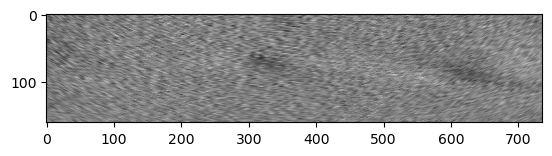

../data/2023_imagery/filtered/074_SPKLFMOV/W1593702596.png


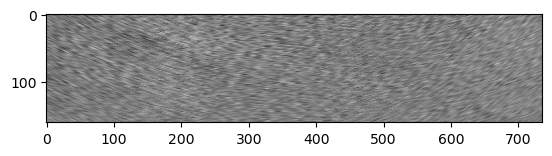

../data/2023_imagery/filtered/074_SPKLFMOV/W1593708713.png


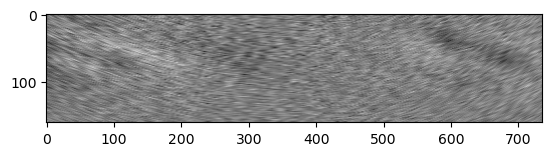

../data/2023_imagery/filtered/074_SPKLFMOV/W1593682206.png


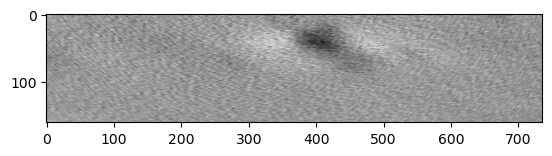

../data/2023_imagery/filtered/074_SPKLFMOV/W1593706674.png


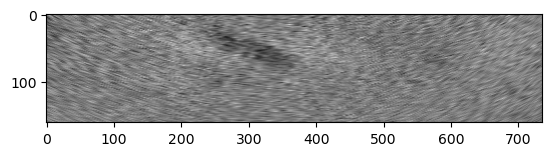

../data/2023_imagery/filtered/074_SPKLFMOV/W1593692401.png


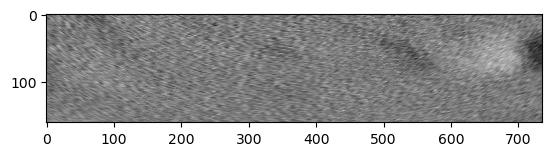

../data/2023_imagery/filtered/074_SPKLFMOV/W1593690362.png


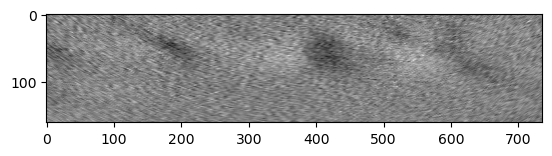

../data/2023_imagery/filtered/074_SPKLFMOV/W1593680167.png


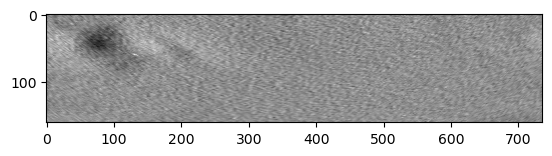

(17, 160, 736)


In [4]:
test_folder = glob.glob(f"../data/2023_imagery/filtered/{folder_of_interest}/*.png")
# for path in test_folder:
#     # print(path)
pixel_values_list = []

for img_path in test_folder:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        print(img_path)
        plt.imshow(img, cmap = "gray")
        plt.show()
        pixel_values_list.append(img)


pixel_values_list = normalize(np.array(pixel_values_list), axis=1)
print(pixel_values_list.shape)

1/1 [==============================] - 1s 1s/step


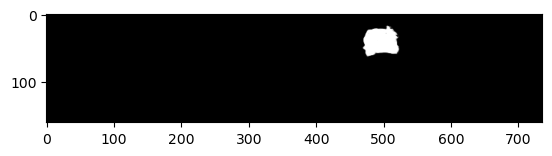

1/1 [==============================] - 0s 182ms/step


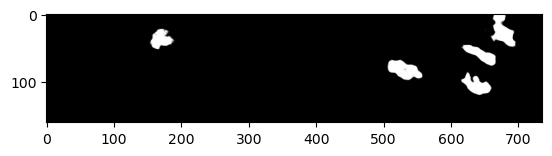

1/1 [==============================] - 0s 173ms/step


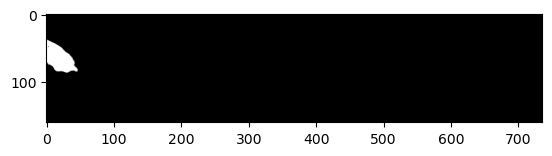

1/1 [==============================] - 0s 182ms/step


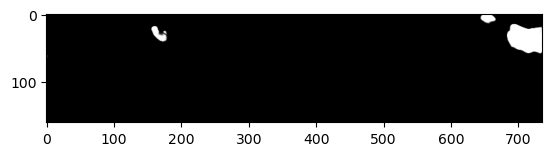

1/1 [==============================] - 0s 183ms/step


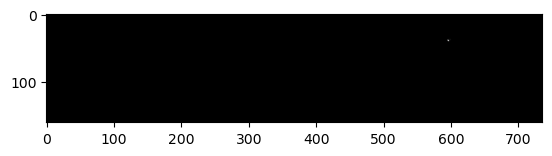

1/1 [==============================] - 0s 175ms/step


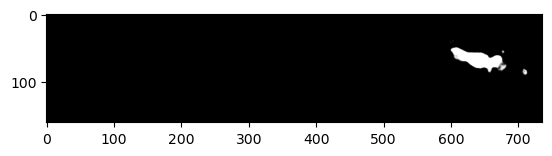

1/1 [==============================] - 0s 173ms/step


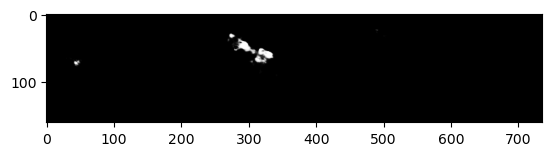

1/1 [==============================] - 0s 171ms/step


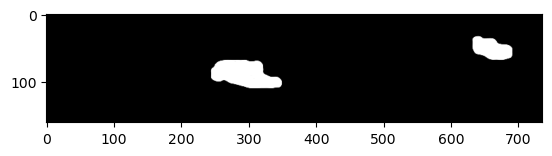

1/1 [==============================] - 0s 171ms/step


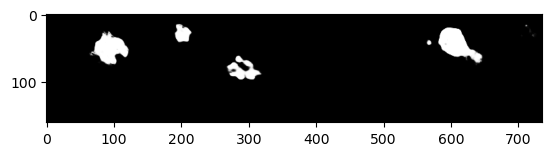

1/1 [==============================] - 0s 169ms/step


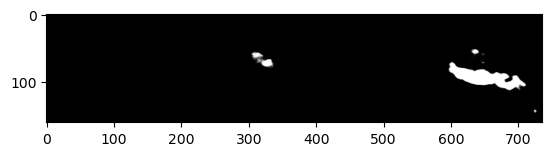

1/1 [==============================] - 0s 173ms/step


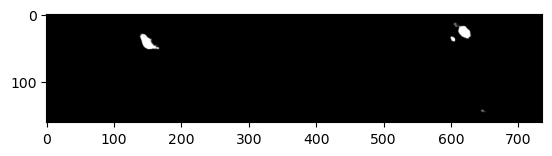

1/1 [==============================] - 0s 177ms/step


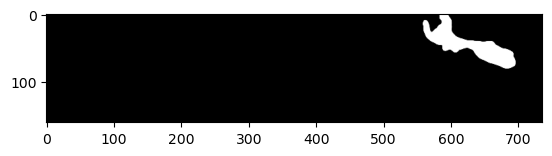

1/1 [==============================] - 0s 173ms/step


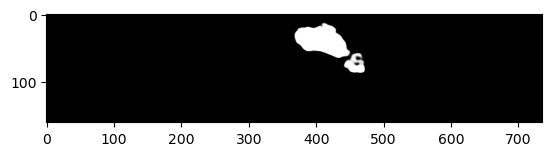

1/1 [==============================] - 0s 172ms/step


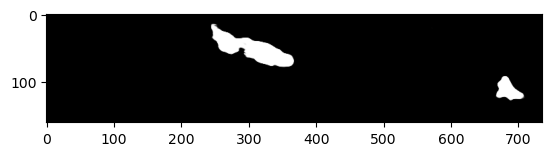

1/1 [==============================] - 0s 170ms/step


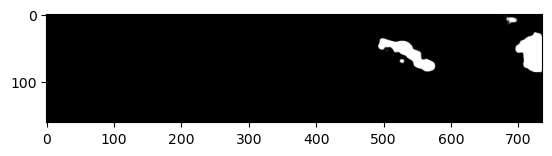

1/1 [==============================] - 0s 176ms/step


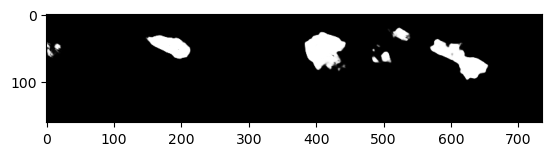

1/1 [==============================] - 0s 169ms/step


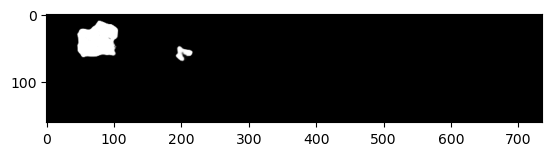

In [5]:
model_results = []

for img in  pixel_values_list:
    img = img.reshape((1, 160, 736))
    prediction = model.predict(img)
    prediction = prediction.reshape((160, 736))
    plt.imshow(prediction, cmap = "gray")
    plt.show()

    prediction[prediction > .30] = 1
    prediction[prediction <= .30] = 0
    prediction = prediction.astype(np.uint8)

    model_results.append(prediction)

model_results = np.array(model_results)

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593678128_1_CALIB.rpjb


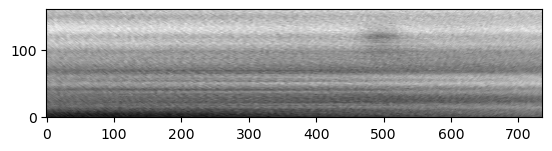

done x 0


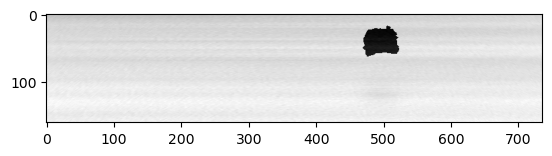

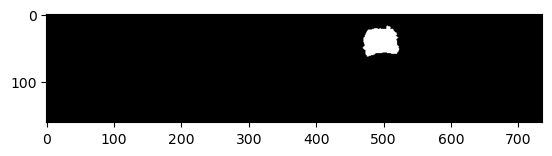

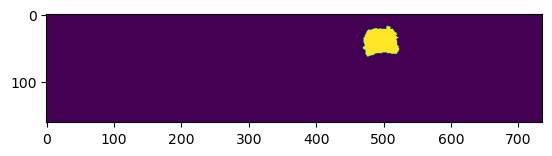

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593676089_1_CALIB.rpjb


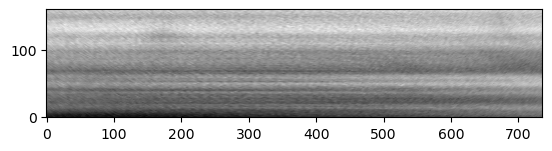

done x 0
done x 1
done x 2
done x 3
done x 4


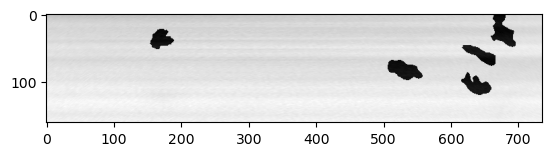

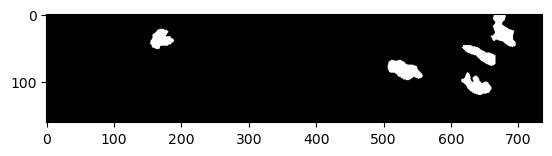

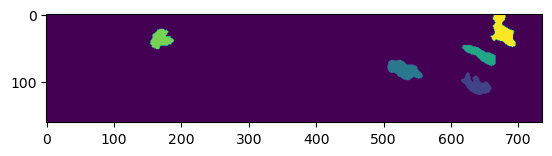

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593704635_1_CALIB.rpjb


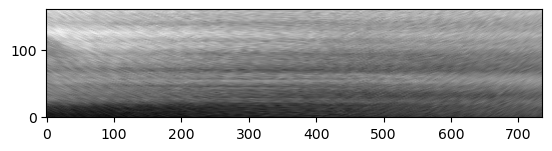

done x 0


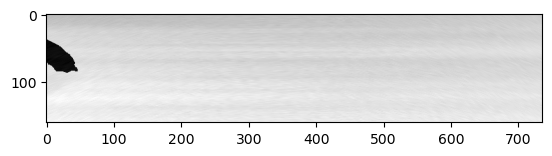

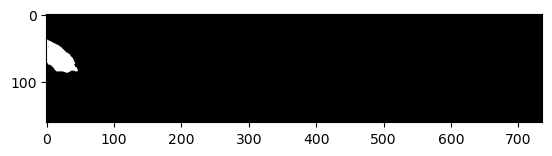

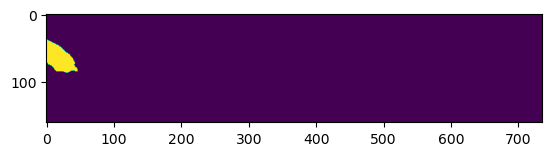

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593684245_1_CALIB.rpjb


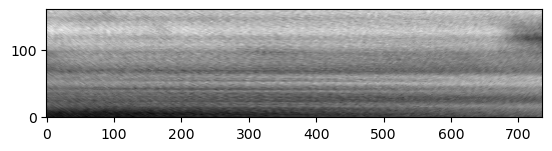

done x 0
done x 1
done x 2


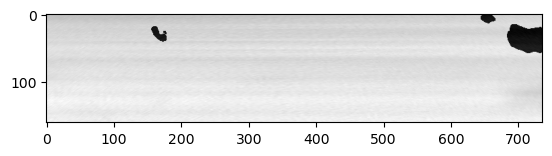

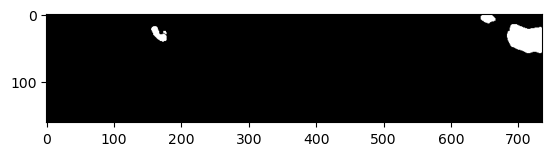

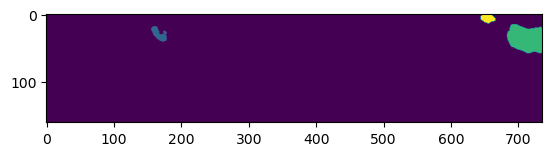

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593700557_1_CALIB.rpjb


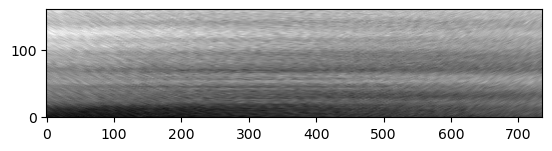

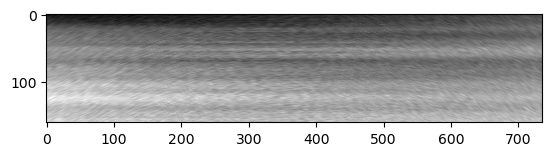

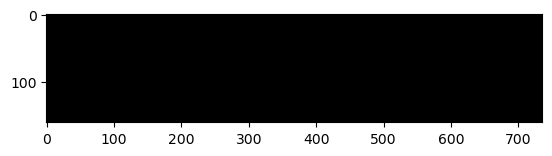

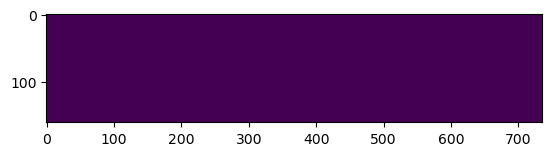

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593698518_1_CALIB.rpjb


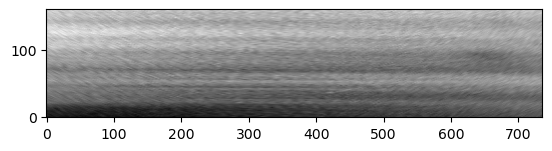

done x 0


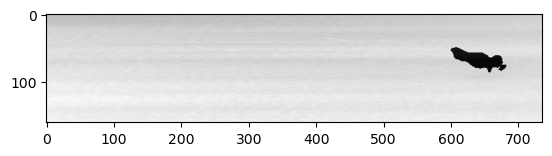

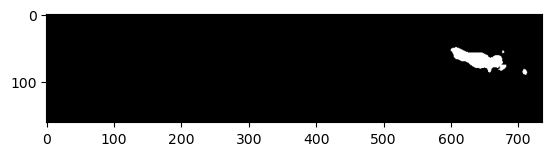

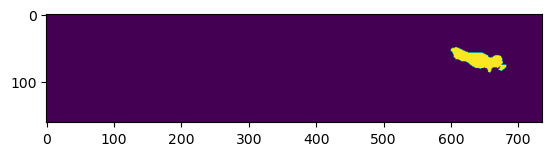

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593686284_1_CALIB.rpjb


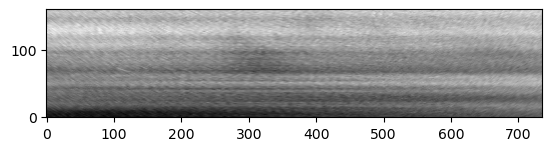

done x 0
done x 1


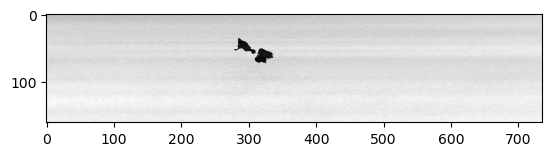

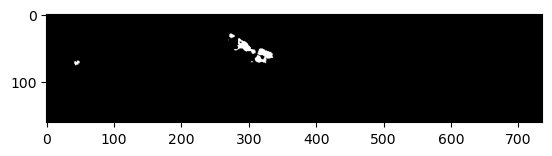

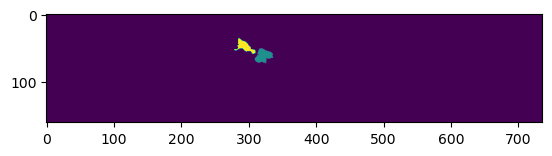

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593694440_1_CALIB.rpjb


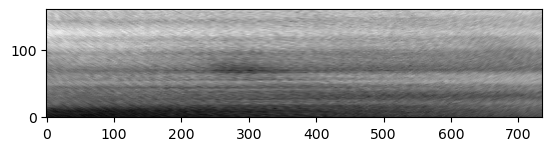

done x 0
done x 1


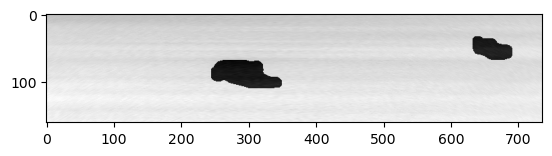

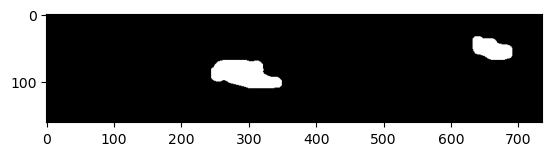

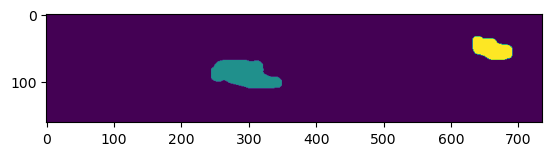

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593688323_1_CALIB.rpjb


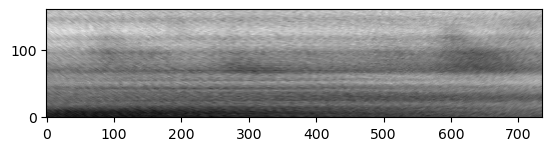

done x 0
done x 1
done x 2
done x 3


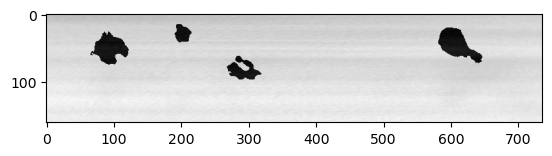

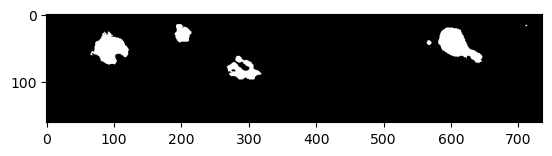

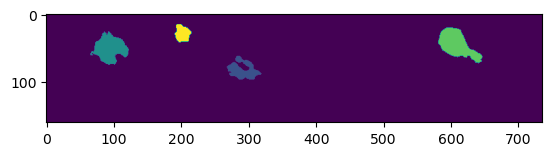

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593696479_1_CALIB.rpjb


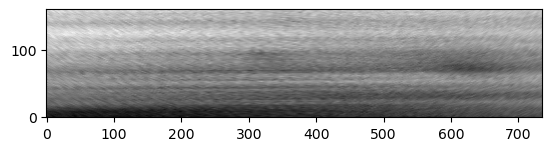

done x 0
done x 1


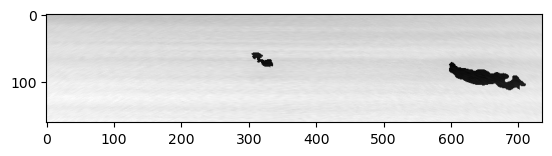

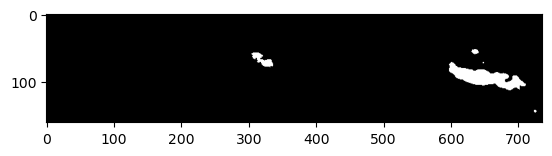

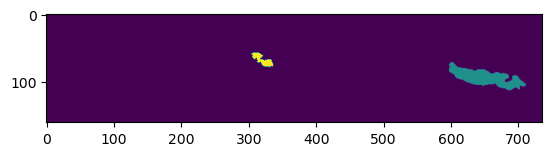

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593702596_1_CALIB.rpjb


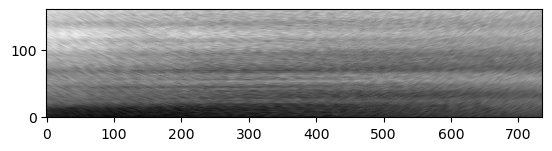

done x 0
done x 1


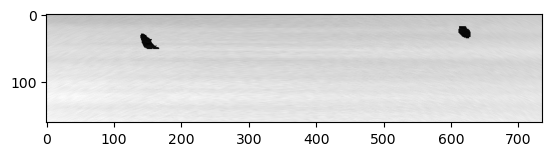

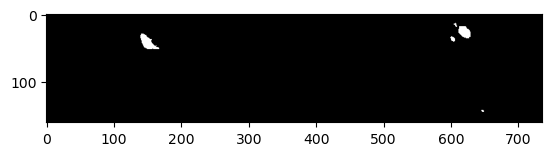

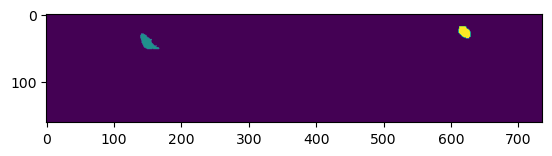

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593708713_1_CALIB.rpjb


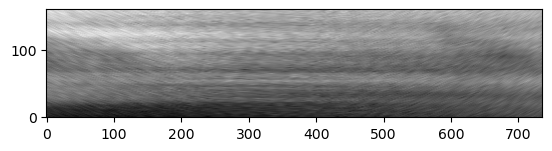

done x 0


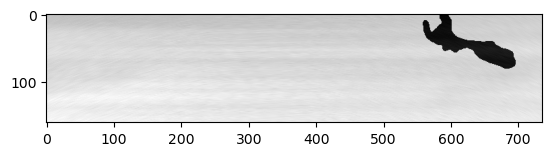

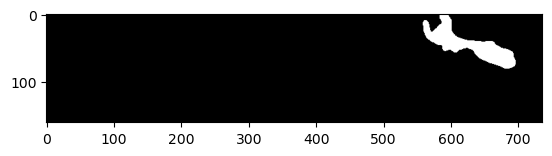

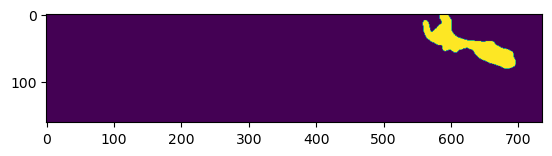

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593682206_1_CALIB.rpjb


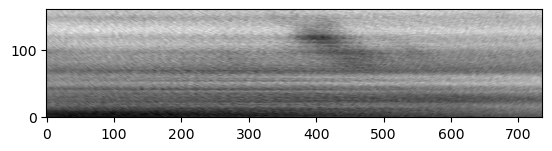

done x 0
done x 1


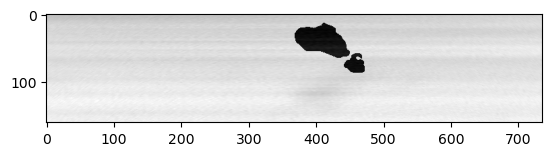

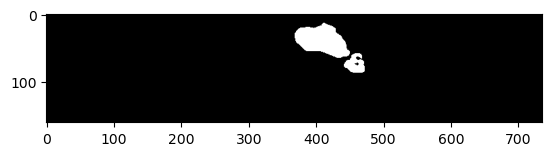

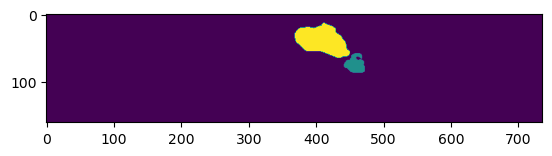

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593706674_1_CALIB.rpjb


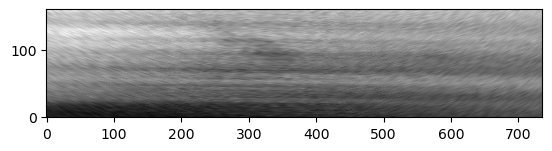

done x 0
done x 1


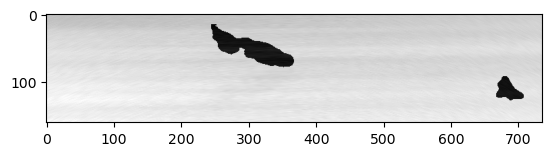

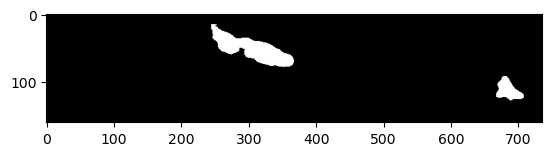

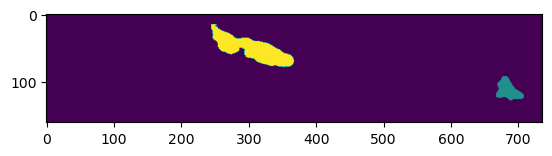

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593692401_1_CALIB.rpjb


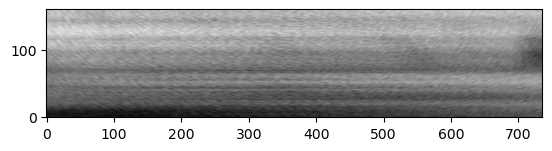

done x 0
done x 1


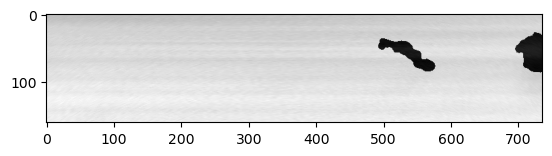

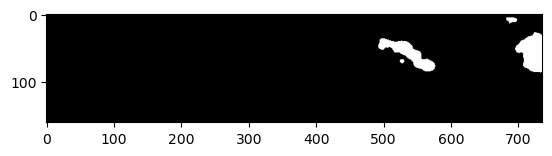

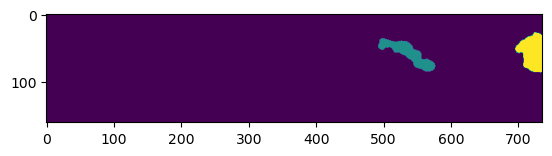

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593690362_1_CALIB.rpjb


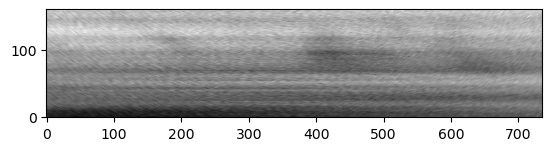

done x 0
done x 1
done x 2
done x 3
done x 4


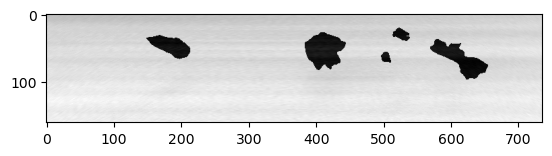

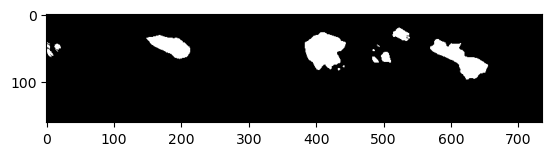

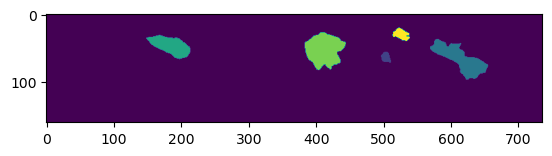

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593680167_1_CALIB.rpjb


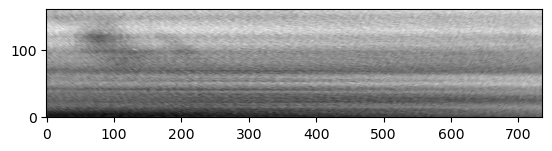

done x 0
done x 1


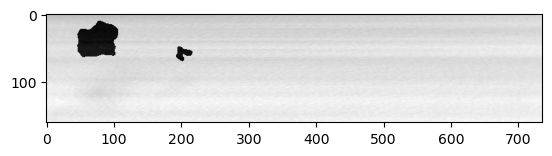

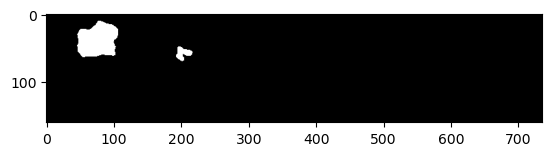

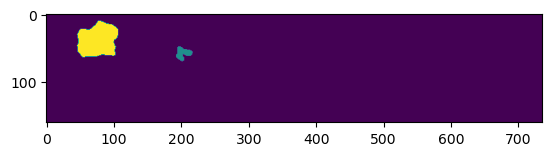

In [6]:
rpjb_parent_path = f"../data/2023_rpjb/good/{folder_of_interest}/"
rpjb_path = [rpjb_parent_path+x.split("/")[-1].split(".")[0]+"_1_CALIB.rpjb" for x in test_folder]

for model_result,rpjb_path in zip(model_results, rpjb_path):
    print(model_result.shape)
    print(rpjb_path)


    idl = io.readsav(rpjb_path)
    filename,pixel_values, coords =  preprocess_filter.apply_filters(rpjb_path)
    # pixel_values = preprocess_filter.remove_cosmic_rays(pixel_values)
    # pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
    # pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)
    pixel_values, coords = preprocess_filter.buffer_image(pixel_values, 736, 160, coords)
    plt.imshow(pixel_values, cmap = "gray", origin = "lower")
    plt.show()




    spokes, filtered_contours = spoketools.color_spokes(model_result, 100)
    data_without_sky = spoketools.intensity_correction(pixel_values, filtered_contours, spokes)
    plt.imshow(data_without_sky, cmap = "gray")
    plt.show()



    

    lon_array = coords[1]
    rad_array =  coords[0]


    plt.imsave(fname=f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/imagery/{rpjb_path.split('/')[-1].split('.')[0]}_ML_model_result.png", arr=model_result, cmap='gray', format='png')
    plt.imshow(model_result, cmap = "gray")
    plt.show()
    plt.imshow(spokes)
    plt.show()
    plt.imsave(fname=f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/imagery/{rpjb_path.split('/')[-1].split('.')[0]}_ML_color_result.png", arr=spokes, format='png')
    spoketools.spokestext(data_without_sky, spokes, rad_array, lon_array, f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{rpjb_path.split('/')[-1].split('.')[0]}_ML.txt")

In [7]:
import create_txt_from_lucy


px_txt = glob.glob(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/*CALIB_ML.txt")
frame_list = []

for path in px_txt:
    frame_list.append(create_txt_from_lucy.bypixel_summary(path))
total_list = pd.concat(frame_list, axis = 0)

total_list.to_csv(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_summary.csv")


../data/2023_imagery/filtered/074_SPKLFMOV/074_SPKLFMOV_model_application/pixel_dropout/txt_data/W1593700557_1_CALIB_ML.txt: this file is empty


In [8]:
csv_path = f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_summary.csv"
pd.read_csv(csv_path)

,filename,min_rad,max_rad,min_lon,max_lon,num_spokes,avg_spoke_intensity,num_pix,avg_pix_per_spoke
0,W1593680167_1_CALIB_ML.txt,99034.091,104062.500,91.103,101.361,2,0.005022,2811,1405.500
1,W1593690362_1_CALIB_ML.txt,99578.313,106445.783,98.081,128.501,5,0.002028,6101,1220.200
2,W1593704635_1_CALIB_ML.txt,100944.625,105635.179,90.042,92.810,1,0.000992,1397,1397.000
3,W1593702596_1_CALIB_ML.txt,99067.524,102250.804,98.385,127.814,2,0.002335,570,285.000
4,W1593698518_1_CALIB_ML.txt,102113.565,105615.142,125.771,130.706,1,-0.003939,1450,1450.000
5,W1593708713_1_CALIB_ML.txt,97076.412,105049.834,123.984,132.229,1,0.005147,3698,3698.000
6,W1593684245_1_CALIB_ML.txt,98046.647,103032.070,98.001,132.771,3,-0.005111,2279,759.667
7,W1593694440_1_CALIB_ML.txt,100648.148,107685.185,104.197,131.032,2,0.002223,4647,2323.500
8,W1593688323_1_CALIB_ML.txt,99196.429,106428.571,92.929,127.849,4,0.004580,4704,1176.000
9,W1593678128_1_CALIB_ML.txt,99691.011,103483.146,116.370,119.547,1,0.001340,1802,1802.000


In [9]:
import create_txt_from_lucy

frame_list = []
px_txt = glob.glob(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/*CALIB_ML.txt")

for path in px_txt:
     frame_list.append(create_txt_from_lucy.create_perSpoke_data(path))



total_list_perSpoke = pd.concat(frame_list, axis = 0)

total_list_perSpoke.to_csv(f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_perSpoke.csv")


In [10]:
csv_path = f"../data/2023_imagery/filtered/{folder_of_interest}/{folder_of_interest}_model_application/{model_of_interest}/txt_data/{folder_of_interest}_{model_of_interest}_perSpoke.csv"
pd.read_csv(csv_path)

,filename,spoke_num,min_rad,max_rad,min_lon,max_lon,mean_intensity,pixel_count
0,W1593680167,1,102272.727273,104062.500000,99.921327,101.361099,0.003184,296
1,W1593680167,2,99034.090909,103551.136364,91.102722,94.702153,0.005238,2515
2,W1593690362,1,102831.325301,104186.746988,119.002183,119.843831,-0.001708,173
3,W1593690362,2,101114.457831,106445.783133,123.390778,128.500787,-0.001799,2034
4,W1593690362,3,100572.289157,103734.939759,98.081207,101.928743,0.000688,1296
5,W1593690362,4,100210.843373,105180.722892,112.208877,115.815942,0.007351,2285
6,W1593690362,5,99578.313253,101295.180723,120.024184,121.527128,-0.004354,313
7,W1593704635,1,100944.625407,105635.179153,90.042463,92.810334,0.000992,1397
8,W1593702596,1,100128.617363,102250.803859,98.385030,100.009947,0.003652,325
9,W1593702596,2,99067.524116,100707.395498,126.790987,127.814083,0.000588,245
